In [1]:
from absbox.local.china import SPV
from absbox import API
localAPI = API("http://localhost:8081",'chinese',check=False)

#remoteAPI = API("https://absbox.org/api/latest",'chinese')


mypool = {'清单':[
          ["按揭贷款"
           ,{"放款金额":1000,"放款利率":["固定",0.01],"初始期限":12
            ,"频率":"每月","类型":"等额本息","放款日":"2021-02-01"}
            ,{"当前余额":600 ,"当前利率":0.03,"剩余期限":8,"状态":"正常"}]],
          '封包日':"2021-04-04"}


myAssump = ("Pool",("Mortgage",{"CDR":0.01},None,None,None)
                                    ,None
                                    ,None)

p = localAPI.runPool(mypool,poolAssump=myAssump,debug=True)
p

Connecting engine server -> http://localhost:8081

✅Connected, local lib:0.26.4, server:0.28.1

'{"tag": "SingleRunPoolReq", "contents": [{"tag": "MPool", "contents": {"tag": "SoloPool", "contents": {"assets": [{"tag": "Mortgage", "contents": [{"originBalance": 1000, "originRate": {"tag": "Fix", "contents": ["DC_ACT_365F", 0.01]}, "originTerm": 12, "period": "Monthly", "startDate": "2021-02-01", "prinType": {"tag": "Level"}, "prepaymentPenalty": null, "tag": "MortgageOriginalInfo"}, 600, 0.03, 8, null, {"tag": "Current"}]}], "asOfDate": "2021-04-04", "issuanceStat": null, "futureCf": null, "extendPeriods": {"tag": "MonthEnd"}}}}, {"tag": "PoolLevel", "contents": [{"tag": "MortgageAssump", "contents": [{"tag": "DefaultCDR", "contents": 0.01}, null, null, null]}, [], {"tag": "DummyDefaultAssump"}]}, null]}'

In [2]:
p = localAPI.runPool(mypool,poolAssump=myAssump)
p

{'PoolConsol': (                余额     本金    利息  早偿金额  违约金额  回收金额  损失金额    利率 债务人数量 早偿手续费  \
  日期                                                                          
  2021-06-01  600.00   0.00  0.00     0  0.00     0  0.00  0.03  None  None   
  2021-07-01  525.22  74.29  1.49     0  0.49     0  0.49  0.03  None  None   
  2021-08-01  450.37  74.41  1.31     0  0.44     0  0.44  0.03  None  None   
  2021-09-01  375.46  74.53  1.12     0  0.38     0  0.38  0.03  None  None   
  2021-10-01  300.49  74.66  0.93     0  0.31     0  0.31  0.03  None  None   
  2021-11-01  225.47  74.77  0.75     0  0.25     0  0.25  0.03  None  None   
  2021-12-01  150.38  74.91  0.56     0  0.18     0  0.18  0.03  None  None   
  2022-01-01   75.22  75.04  0.37     0  0.12     0  0.12  0.03  None  None   
  2022-02-01    0.00  75.16  0.18     0  0.06     0  0.06  0.03  None  None   
  
                累计还款  累计早偿  累计拖欠  累计违约  累计回收  累计损失  
  日期                                                
  2021-0

In [2]:
API("http://localhost:8081",'english')

API(url='http://localhost:8081', lang='english', version=('0', '8', '1'))

In [7]:
p = remoteAPI.runPool(mypool,assumptions=myAssump)
p

,未偿余额,本金,利息,早偿金额,违约金额,回收金额,损失,利率
日期,,,,,,,,
2021-05-01,524.36,74.66,0.49,0.49,0.49,0,0.49,0.01
2021-06-01,449.64,74.72,0.43,0.00,0.00,0,0.00,0.01
2021-07-01,374.86,74.78,0.37,0.00,0.00,0,0.00,0.01
2021-08-01,300.02,74.84,0.31,0.00,0.00,0,0.00,0.01
2021-09-01,225.10,74.92,0.24,0.00,0.00,0,0.00,0.01
2021-10-01,150.13,74.97,0.18,0.00,0.00,0,0.00,0.01
2021-11-01,75.10,75.03,0.12,0.00,0.00,0,0.00,0.01
2021-12-01,0.00,75.10,0.06,0.00,0.00,0,0.00,0.01


In [4]:
myAssump = [{"CDR":[0.01,0.0]}
            ,{"CPR":[0.01,0.01,0.02,0.01,0.01
                    ,0.01,0.01,0.01,0.01,0.01,0.01]}]

p = localAPI.runPool(mypool,assumptions=myAssump)
p

,未偿余额,本金,利息,早偿金额,违约金额,回收金额,损失,利率
日期,,,,,,,,
2021-05-01,524.36,74.66,0.49,0.49,0.49,0,0.49,0.01
2021-06-01,449.26,74.66,0.43,0.44,0.00,0,0.00,0.01
2021-07-01,373.92,74.60,0.37,0.74,0.00,0,0.00,0.01
2021-08-01,299.02,74.59,0.31,0.31,0.00,0,0.00,0.01
2021-09-01,224.17,74.60,0.24,0.25,0.00,0,0.00,0.01
2021-10-01,149.39,74.60,0.18,0.18,0.00,0,0.00,0.01
2021-11-01,74.67,74.60,0.12,0.12,0.00,0,0.00,0.01
2021-12-01,0.00,74.61,0.06,0.06,0.00,0,0.00,0.01


In [5]:
p['利息'].sum(),p['本金'].sum()

(12, 999.9600000000002)

In [36]:
myAssump = []

p = localAPI.runPool(mypool,assumptions=myAssump)
p

,未偿余额,本金,利息,早偿金额,违约金额,回收金额,损失,利率
日期,,,,,,,,
2021-05-01,91.67,8.33,0.99,0,0,0,0,0.1
2021-06-01,83.34,8.33,0.99,0,0,0,0,0.1
2021-07-01,75.01,8.33,0.99,0,0,0,0,0.1
2021-08-01,66.68,8.33,0.99,0,0,0,0,0.1
2021-09-01,58.35,8.33,0.99,0,0,0,0,0.1
2021-10-01,50.02,8.33,0.99,0,0,0,0,0.1
2021-11-01,41.69,8.33,0.99,0,0,0,0,0.1
2021-12-01,33.36,8.33,0.99,0,0,0,0,0.1
2022-01-01,25.03,8.33,0.99,0,0,0,0,0.1


In [37]:
p['利息'].sum()

11.88

In [48]:
mypool = {'清单':[
          ["租赁"
           ,{"固定租金":1000,"初始期限":12,"剩余期限":8,"频率":["每月",10],"起始日":"2021-01-25"}]
          ],
          '封包日':"2021-01-04"}

#myAssump = [{"CDR":0.06},{"CPR":0.03}]
#myAssump = [{"CDR":[0.01,0.0]},{"CPR":[0.01,]}]

p = localAPI.runPool(mypool,assumptions=[],read=True)
p

,租金
日期,
2021-02-10,16000
2021-03-10,28000
2021-04-10,31000
2021-05-10,30000
2021-06-10,31000
2021-07-10,30000
2021-08-10,31000
2021-09-10,31000
2021-10-10,30000


In [58]:
mypool = {'清单':[
        ["租赁"
         ,{"初始租金":100,"初始期限":12
          ,"频率":"月末","起始日":"2021-02-28"
          ,"计提周期":"季度末", "涨幅":0.05}]],
        '封包日':"2021-06-04"}

#myAssump = [{"CDR":0.06},{"CPR":0.03}]
#myAssump = [{"CDR":[0.01,0.0]},{"CPR":[0.01,]}]

p = localAPI.runPool(mypool,assumptions=[],read=True)
p

,租金
日期,
2021-06-30,3150.00
2021-07-31,3417.75
2021-08-31,3417.75
2021-09-30,3307.50
2021-10-31,3588.56
2021-11-30,3472.80
2021-12-31,3588.56
2022-01-31,3768.05
2022-02-28,3403.40


In [23]:
mypool = {'清单':[["租赁",{"初始租金":100,"初始期限":12,"频率":"月末","起始日":"2021-02-01","计提周期":"季度末", "涨幅":0.05}]],
        '封包日':"2021-01-04"}

#myAssump = [{"CDR":0.06},{"CPR":0.03}]
#myAssump = [{"CDR":[0.01,0.0]},{"CPR":[0.01,]}]

p = remoteAPI.runPool(mypool,assumptions=[],read=True)
p

,租金
日期,
2021-02-28,2700.00
2021-03-31,3100.00
2021-04-30,3150.00
2021-05-31,3255.00
2021-06-30,3150.00
2021-07-31,3417.75
2021-08-31,3417.75
2021-09-30,3307.50
2021-10-31,3588.56


In [13]:
remoteAPI.server_info

{'version': ' 0.8.1 '}

In [1]:
import matplotlib
matplotlib.rcParams['font.family']='Source Han Serif CN'
matplotlib.rcParams['axes.unicode_minus'] = False

In [100]:
from absbox import API,comp_engines
from absbox.local.util import aggCFby,bondView,PnLView,balanceSheetView,irr
from absbox.local.china import SPV

remoteAPI = API("https://absbox.org/api/latest",'chinese')
localAPI = API("http://localhost:8081",'chinese')

<AxesSubplot:xlabel='日期', ylabel='租金合计'>

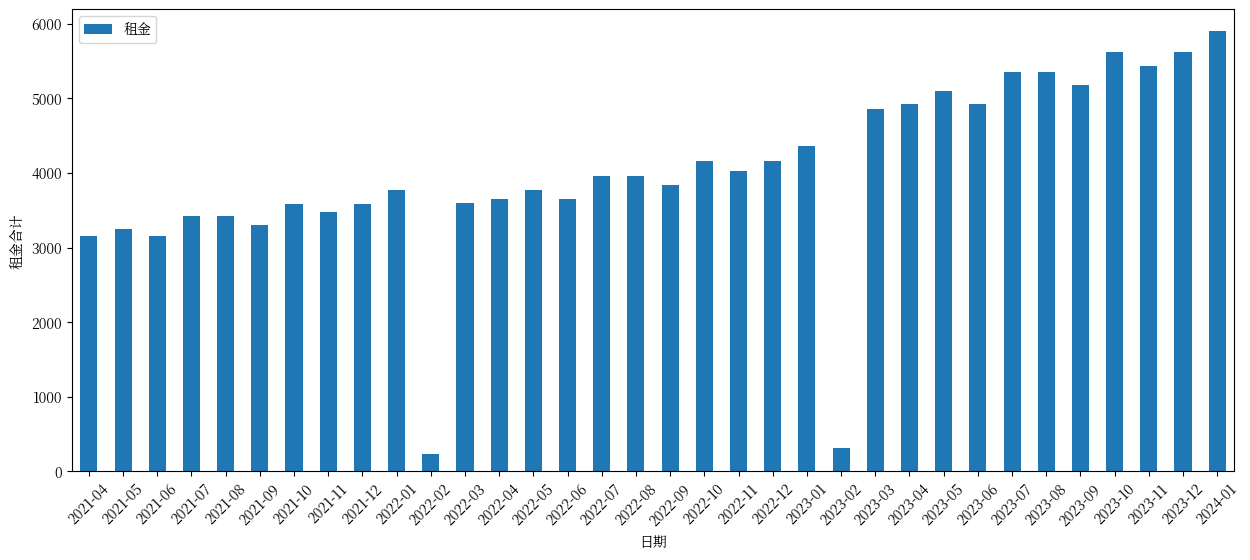

In [3]:
mypool = {'清单':[["租赁",{"初始租金":100,"初始期限":12,"频率":"月末","起始日":"2021-02-01","计提周期":"季度末", "涨幅":0.05}]
                 #,["租赁",{"初始租金":100,"初始期限":12,"频率":"月末","起始日":"2021-02-01","计提周期":"季度末", "涨幅":[0.05,0.06,0.0]}]
                 #,["租赁",{"固定租金":100,"初始期限":12,"频率":["每月",20],"起始日":"2021-02-01"}]
               ]
         ,'封包日':"2021-04-04"}

p = localAPI.runPool(mypool,assumptions=[{"租赁截止日":"2023-02-01"}
                                        ,{"租赁间隔":25}
                                        ,{"租赁年涨幅":[["2021-01-01",0.05],["2022-01-01",0.15],["2023-01-01",0.35]]}],read=True)

aggCFby(p,"M",["租金"]).plot.bar(rot=45,ylabel="租金合计",figsize=(15, 6))

In [50]:
 deal_data = ["租金类ABS案例"
    ,{"封包日":"2021-03-31","起息日":"2021-06-15","首次兑付日":"2021-07-26"
      ,"法定到期日":"2060-12-01","收款频率":"月末","付款频率":["每月",26]}
    ,{'清单':[["租赁",{"初始租金":100,"初始期限":12,"频率":"月末","起始日":"2021-02-01","计提周期":"季度末", "涨幅":0.05}]]}
    ,(("账户01",{"余额":0}),)
    ,(("A1",{"当前余额":60_000
             ,"当前利率":0.07
             ,"初始余额":60_000
             ,"初始利率":0.07
             ,"起息日":"2020-01-03"
             ,"利率":{"固定":0.08}
             ,"债券类型":{"锁定摊还":"2022-10-26"}
            })
      ,("B",{"当前余额":10_000
             ,"当前利率":0.00
             ,"初始余额":100
             ,"初始利率":0.00
             ,"起息日":"2020-01-03"
             ,"利率":{"期间收益":0.02}
             ,"债券类型":{"权益":None}
             }))
    ,(("日常费用",{"类型":{"周期费用":[["每月",1],500]}}),)
    ,{"未违约":[
         ["支付费用",["账户01"],['日常费用']]
         ,["支付利息","账户01",["A1"]]
         ,["支付本金","账户01",["A1"]]
         ,["支付期间收益","账户01",["B"]]
         ,[[('债券余额','A1') ,"=",0]
          ,["支付本金","账户01",["B"]]
          ,["支付收益","账户01","B"]]
     ]}
    ,(["租金回款","账户01"],)
    ,None
    ,None
    ,None]
SPV(*deal_data)

信贷ABS(名称='租金类ABS案例', 日期={'封包日': '2021-03-31', '起息日': '2021-06-15', '首次兑付日': '2021-07-26', '法定到期日': '2060-12-01', '收款频率': '月末', '付款频率': ['每月', 26]}, 资产池={'清单': [['租赁', {'初始租金': 100, '初始期限': 12, '频率': '月末', '起始日': '2021-02-01', '计提周期': '季度末', '涨幅': 0.05}]]}, 账户=(('账户01', {'余额': 0}),), 债券=(('A1', {'当前余额': 60000, '当前利率': 0.07, '初始余额': 60000, '初始利率': 0.07, '起息日': '2020-01-03', '利率': {'固定': 0.08}, '债券类型': {'锁定摊还': '2022-10-26'}}), ('B', {'当前余额': 10000, '当前利率': 0.0, '初始余额': 100, '初始利率': 0.0, '起息日': '2020-01-03', '利率': {'期间收益': 0.02}, '债券类型': {'权益': None}})), 费用=(('日常费用', {'类型': {'周期费用': [['每月', 1], 500]}}),), 分配规则={'未违约': [['支付费用', ['账户01'], ['日常费用']], ['支付利息', '账户01', ['A1']], ['支付本金', '账户01', ['A1']], ['支付期间收益', '账户01', ['B']], [[('债券余额', 'A1'), '=', 0], ['支付本金', '账户01', ['B']], ['支付收益', '账户01', 'B']]]}, 归集规则=(['租金回款', '账户01'],), 清仓回购=None, 流动性支持=None, 自定义=None, 触发事件=None, 状态='摊销')

In [94]:
total_issuance = 70_000
financing_plans = [(60_000,0.075,"2022-06-15"),(50_000,0.05,"2022-01-15")] 
liability_plans = [ (('A1',  {'当前余额': b, '当前利率': r,   '初始余额': b,   '初始利率': r,   '起息日': '2020-01-03',
   '利率': {'固定': 0.08}, '债券类型': {'锁定摊还': t}}),
  ('B',  {'当前余额': total_issuance - b,   '当前利率': 0.0,   '初始余额': total_issuance - b,   '初始利率': 0.0,   '起息日': '2020-01-03',
   '利率': {'期间收益': 0.02}, '债券类型': {'权益': None}}))
    for b,r,t in financing_plans ]

In [95]:
SPVs = [ SPV(*update_deal(deal_data,4,p)) for p in liability_plans ]
SPVs

[信贷ABS(名称='租金类ABS案例', 日期={'封包日': '2021-03-31', '起息日': '2021-06-15', '首次兑付日': '2021-07-26', '法定到期日': '2060-12-01', '收款频率': '月末', '付款频率': ['每月', 26]}, 资产池={'清单': [['租赁', {'初始租金': 100, '初始期限': 12, '频率': '月末', '起始日': '2021-02-01', '计提周期': '季度末', '涨幅': 0.05}]]}, 账户=(('账户01', {'余额': 0}),), 债券=(('A1', {'当前余额': 60000, '当前利率': 0.075, '初始余额': 60000, '初始利率': 0.075, '起息日': '2020-01-03', '利率': {'固定': 0.08}, '债券类型': {'锁定摊还': '2022-06-15'}}), ('B', {'当前余额': 10000, '当前利率': 0.0, '初始余额': 10000, '初始利率': 0.0, '起息日': '2020-01-03', '利率': {'期间收益': 0.02}, '债券类型': {'权益': None}})), 费用=(('日常费用', {'类型': {'周期费用': [['每月', 1], 500]}}),), 分配规则={'未违约': [['支付费用', ['账户01'], ['日常费用']], ['支付利息', '账户01', ['A1']], ['支付本金', '账户01', ['A1']], ['支付期间收益', '账户01', ['B']], [[('债券余额', 'A1'), '=', 0], ['支付本金', '账户01', ['B']], ['支付收益', '账户01', 'B']]]}, 归集规则=(['租金回款', '账户01'],), 清仓回购=None, 流动性支持=None, 自定义=None, 触发事件=None, 状态='摊销'),
 信贷ABS(名称='租金类ABS案例', 日期={'封包日': '2021-03-31', '起息日': '2021-06-15', '首次兑付日': '2021-07-26', '法定到期日': '206

In [96]:
assumps=[{"租赁截止日":"2023-02-01"} ,{"租赁间隔":25} ,{"租赁年涨幅":[["2021-01-01",0.05],["2022-01-01",0.15],["2023-01-01",0.35]]}]
rs = [ localAPI.run(s,assumptions=assumps,read=True) for s in SPVs ]


[1.1749580171446379, 0.5778842816301396]

In [10]:
bondView(p).drop([("A1","备注"),("B","备注")],axis=1)

A1                                           B           \
                  余额      利息        本金  执行利率      本息合计        余额       利息   
日期                                                                          
2021-07-26  60000.00  471.78      0.00  0.07    471.78  10000.00     2.00   
2021-08-26  60000.00  356.71      0.00  0.07    356.71  10000.00     1.87   
2021-09-26  60000.00  356.71      0.00  0.07    356.71  10000.00      NaN   
2021-10-26  60000.00  345.20      0.00  0.07    345.20  10000.00      NaN   
2021-11-26  60000.00  356.71      0.00  0.07    356.71  10000.00      NaN   
2021-12-26  60000.00  345.20      0.00  0.07    345.20  10000.00      NaN   
2022-01-26  60000.00  356.71      0.00  0.07    356.71  10000.00     1.72   
2022-02-26  60000.00  356.71      0.00  0.07    356.71  10000.00      NaN   
2022-03-26  60000.00  322.19      0.00  0.07    322.19  10000.00      NaN   
2022-04-26  60000.00  356.71      0.00  0.07    356.71  10000.00      NaN   
2022-05-26  60000.00  345.20      0.00  0.07    345.20  10000.00      NaN   
2022-06-26  60000.00  356.71      0.00  0.07    356.71  10000.00      NaN   
2022-07-26  60000.00  345.20      0.00  0.07    345.20  10000.00      NaN   
2022-08-26  60000.00  356.71      0.00  0.07    356.71  10000.00      NaN   
2022-09-26  60000.00  356.71      0.00  0.07    356.71  10000.00      NaN   
2022-10-26  12466.65  345.20  47533.35  0.07  47878.55  10000.00      NaN   
2022-11-26   8881.80   74.11   3584.85  0.07   3658.96  10000.00      NaN   
2022-12-26   5408.10   51.10   3473.70  0.07   3524.80  10000.00      NaN   
2023-01-26   1781.29   32.15   3626.81  0.07   3658.96  10000.00     0.00   
2023-02-26      0.00   10.59   1781.29  0.07   1791.88   7926.47     1.56   
2023-03-26      0.00     NaN       NaN   NaN       NaN   7926.47     0.00   
2023-04-26      0.00     NaN       NaN   NaN       NaN   3763.29     0.00   
2023-05-26      0.00     NaN       NaN   NaN       NaN      0.00   665.11   
2023-06-26      0.00     NaN       NaN   NaN       NaN      0.00  4592.68   
2023-07-26      0.00     NaN       NaN   NaN       NaN      0.00  4428.40   
2023-08-26      0.00     NaN       NaN   NaN       NaN      0.00  4847.19   
2023-09-26      0.00     NaN       NaN   NaN       NaN      0.00  4847.19   
2023-10-26      0.00     NaN       NaN   NaN       NaN      0.00  4674.70   
2023-11-26      0.00     NaN       NaN   NaN       NaN      0.00  5114.72   
2023-12-26      0.00     NaN       NaN   NaN       NaN      0.00  4933.60   
2024-01-26      0.00     NaN       NaN   NaN       NaN      0.00  5114.72   
2024-02-26      0.00     NaN       NaN   NaN       NaN      0.00  5395.27   

                                   
                 本金 执行利率     本息合计  
日期                                 
2021-07-26     0.00  0.0     2.00  
2021-08-26     0.00  0.0     1.87  
2021-09-26      NaN  NaN      NaN  
2021-10-26      NaN  NaN      NaN  
2021-11-26      NaN  NaN      NaN  
2021-12-26      NaN  NaN      NaN  
2022-01-26     0.00  0.0     1.72  
2022-02-26      NaN  NaN      NaN  
2022-03-26      NaN  NaN      NaN  
2022-04-26      NaN  NaN      NaN  
2022-05-26      NaN  NaN      NaN  
2022-06-26      NaN  NaN      NaN  
2022-07-26      NaN  NaN      NaN  
2022-08-26      NaN  NaN      NaN  
2022-09-26      NaN  NaN      NaN  
2022-10-26      NaN  NaN      NaN  
2022-11-26      NaN  NaN      NaN  
2022-12-26      NaN  NaN      NaN  
2023-01-26     0.00  0.0     0.00  
2023-02-26  2073.53  0.0  2075.09  
2023-03-26     0.00  0.0     0.00  
2023-04-26  4163.18  0.0  4163.18  
2023-05-26  3763.29  0.0  4428.40  
2023-06-26     0.00  0.0  4592.68  
2023-07-26     0.00  0.0  4428.40  
2023-08-26     0.00  0.0  4847.19  
2023-09-26     0.00  0.0  4847.19  
2023-10-26     0.00  0.0  4674.70  
2023-11-26     0.00  0.0  5114.72  
2023-12-26     0.00  0.0  4933.60  
2024-01-26     0.00  0.0  5114.72  
2024-02-26     0.00  0.0  5395.27

In [13]:
from pyxirr import xnpv

In [16]:
p['bonds']['B'].index

Index(['2021-07-26', '2021-08-26', '2022-01-26', '2023-01-26', '2023-02-26',
       '2023-03-26', '2023-04-26', '2023-05-26', '2023-06-26', '2023-07-26',
       '2023-08-26', '2023-09-26', '2023-10-26', '2023-11-26', '2023-12-26',
       '2024-01-26', '2024-02-26'],
      dtype='object', name='日期')

In [18]:
irr(p['bonds']['B'],init=('2021-06-26',-10000.00))

1.1525429091557522

In [25]:
irr(p['bonds']['A1'],init=('2021-06-15',-60000.00))

0.07228247931774462

<AxesSubplot:xlabel='日期'>

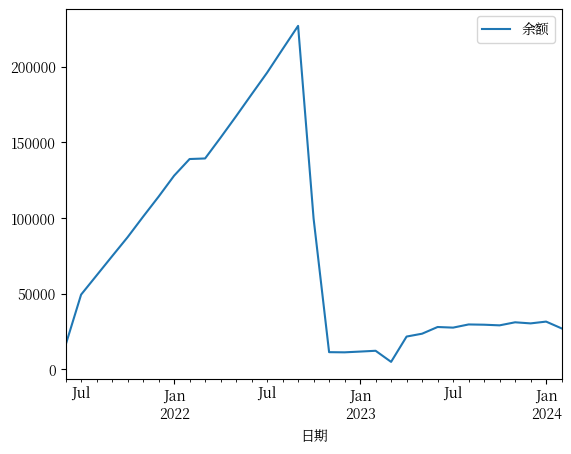

In [8]:
aggCFby(p['accounts']['账户01'],"M",["余额"]).plot(y="余额")

In [9]:
balanceSheetView(p)

KeyError: "None of [Index(['未偿余额'], dtype='object')] are in the [columns]"

In [79]:
p[p['Rental']==30000].index[-1]

'2021-12-12'

In [77]:
p.index[-1]

'2022-01-12'

In [109]:
localAPI = API("http://localhost:8081",'chinese')
remoteAPI = API("https://absbox.org/api/latest",'chinese')

test01 = SPV(
    "Senior/Junior"
    ,{"封包日":"2021-03-31","起息日":"2021-06-15","首次兑付日":"2021-07-26"
      ,"法定到期日":"2060-12-01","收款频率":"月末","付款频率":["每月",26]}
    ,{'清单':[["按揭贷款"
        ,{"放款金额":120,"放款利率":["固定",0.045],"初始期限":30
          ,"频率":"每月","类型":"等额本金","放款日":"2021-02-01"}
          ,{"当前余额":120
          ,"当前利率":0.08
          ,"剩余期限":20
          ,"状态":"正常"}]]}
    ,(("账户01",{"余额":0}),)
    ,(("A1",{"当前余额":100
             ,"当前利率":0.07
             ,"初始余额":100
             ,"初始利率":0.07
             ,"起息日":"2020-01-03"
             ,"利率":{"固定":0.08}
             ,"债券类型":{"过手摊还":None}})
      ,("B",{"当前余额":20
             ,"当前利率":0.0
             ,"初始余额":100
             ,"初始利率":0.00
             ,"起息日":"2020-01-03"
             ,"利率":{"固定":0.00}
             ,"债券类型":{"权益":None}
             }))
    ,(("信托费用",{"类型":{"固定费用":10}}),)
    ,{"未违约":[
         ["支付费用",["账户01"],['信托费用']]
         ,["支付利息","账户01",["A1"]]
         ,["支付本金","账户01",["A1"]]
         ,["支付本金","账户01",["B"]]
         ,["支付收益","账户01","B"]
     ]}
    ,(["利息回款","账户01"]
      ,["本金回款","账户01"]
      ,["早偿回款","账户01"]
      ,["回收回款","账户01"])
    ,None
    ,None
    ,None
)


r = comp_engines(localAPI, remoteAPI, test01)
r['bond']

{'A1':              余额_x   余额_y  利息_x  利息_y  \
 日期                                     
 2021-07-26  90.47  90.47  0.78  0.78   
 2021-08-26  84.33  85.04  0.53  1.24   
 2021-09-26  78.17  80.05  0.50  1.67   
 2021-10-26  72.00  75.48  0.44  2.04   
 2021-11-26  65.87  71.30  0.42  2.37   
 2021-12-26  59.71  67.42  0.37  2.65   
 2022-01-26  53.59  63.85  0.35  2.90   
 2022-02-26  47.45  60.53  0.31  3.13   
 2022-03-26  41.29  57.41  0.25  3.29   
 2022-04-26  35.20  54.54  0.24  3.46   
 2022-05-26  29.07  51.81  0.20  3.60   
 2022-06-26  22.97  49.27  0.17  3.73   
 2022-07-26  16.86  46.86  0.13  3.83   
 2022-08-26  10.77  44.59  0.10  3.92   
 2022-09-26   4.67  42.43  0.06  4.00   
 2022-10-26   0.00  40.36  0.02  4.05   
 2022-11-26    NaN  38.38   NaN  4.09   
 2022-12-26    NaN  36.45   NaN  4.11   
 
                                                          备注_x  \
 日期                                                              
 2021-07-26  [<PayInt:["A1"],Just 0.00>,

In [129]:
myAssumption = [{"CPR":0.0}
                ,{"CDR":0.00}
                ,{"停止":"2025-01-01"}
                ,{"利率":["LPR5Y",[["2020-01-01",0.05],["2022-08-01",0.05],["2023-08-01",0.06]]]}
              ]

myAssumption2 = [{"CPR":0.0}
                ,{"CDR":0.01}
                ,{"停止":"2025-01-01"}
                ,{"利率":["LPR5Y",[["2020-01-01",0.05],["2022-08-01",0.05],["2023-08-01",0.06]]]}
              ]

r = localAPI.run(test01
            ,assumptions={"00":myAssumption,"01":myAssumption2}
            ,read=True)

# 获取场景 ‘00’ 的结果
r

ERROR:root:Error in modelling:["Scenario:00,Not Valid Asset ID:{'t', 'c'}", "Scenario:01,Not Valid Asset ID:{'t', 'c'}"]


(False,
 ["Scenario:00,Not Valid Asset ID:{'t', 'c'}",
  "Scenario:01,Not Valid Asset ID:{'t', 'c'}"],
 ['Scenario:00,Missing Asset to set assumption:{0}',
  'Scenario:01,Missing Asset to set assumption:{0}'])

In [110]:
r['bond']['A1']

,余额_x,余额_y,利息_x,利息_y,备注_x,备注_y,执行利率_x,执行利率_y,本息合计_x,本息合计_y,本金_x,本金_y
日期,,,,,,,,,,,,
2021-07-26,90.47,90.47,0.78,0.78,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...","[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...",0.07,0.07,10.31,10.31,9.53,9.53
2021-08-26,84.33,85.04,0.53,1.24,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...","[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...",0.07,0.07,6.67,6.67,6.14,5.43
2021-09-26,78.17,80.05,0.50,1.67,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...","[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...",0.07,0.07,6.66,6.66,6.16,4.99
2021-10-26,72.00,75.48,0.44,2.04,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...","[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...",0.07,0.07,6.61,6.61,6.17,4.57
2021-11-26,65.87,71.30,0.42,2.37,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...","[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...",0.07,0.07,6.55,6.55,6.13,4.18
2021-12-26,59.71,67.42,0.37,2.65,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...","[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...",0.07,0.07,6.53,6.53,6.16,3.88
2022-01-26,53.59,63.85,0.35,2.90,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...","[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...",0.07,0.07,6.47,6.47,6.12,3.57
2022-02-26,47.45,60.53,0.31,3.13,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...","[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...",0.07,0.07,6.45,6.45,6.14,3.32
2022-03-26,41.29,57.41,0.25,3.29,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...","[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju...",0.07,0.07,6.41,6.41,6.16,3.12


In [111]:
r['account']['账户01']

,余额_x,余额_y,变动额_x,变动额_y,备注_x,备注_y
日期,,,,,,
2021-06-15,2.31,2.31,2.31,2.31,<PoolInflow:CollectedInterest>,<PoolInflow:CollectedInterest>
2021-06-15,2.31,20.31,2.31,18.00,<PoolInflow:CollectedInterest>,<PoolInflow:CollectedPrincipal>
2021-06-15,2.31,20.31,2.31,0.00,<PoolInflow:CollectedInterest>,<PoolInflow:CollectedPrepayment>
2021-06-15,2.31,20.31,2.31,0.00,<PoolInflow:CollectedInterest>,<PoolInflow:CollectedRecoveries>
2021-06-15,20.31,2.31,18.00,2.31,<PoolInflow:CollectedPrincipal>,<PoolInflow:CollectedInterest>
...,...,...,...,...,...,...
2022-12-26,0.00,6.04,0.00,0.00,<PayYield:B>,"<SeqPayFee:[""\20449\25176\36153\29992""]>"
2022-12-26,0.00,1.93,0.00,-4.11,<PayYield:B>,"<PayInt:[""A1""],Nothing>"
2022-12-26,0.00,0.00,0.00,-1.93,<PayYield:B>,"<PayPrin:[""A1""],Nothing>"


In [121]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [122]:
lm = localAPI.run(test01)
lm['pool']['flow']

,未偿余额,本金,利息,早偿金额,违约金额,回收金额,损失,利率
日期,,,,,,,,
2021-06-15,102,18,2.31,0,0,0,0,0
2021-07-31,96,6,0.67,0,0,0,0,0
2021-08-31,90,6,0.66,0,0,0,0,0
2021-09-30,84,6,0.61,0,0,0,0,0
2021-10-31,78,6,0.55,0,0,0,0,0
2021-11-30,72,6,0.53,0,0,0,0,0
2021-12-31,66,6,0.47,0,0,0,0,0
2022-01-31,60,6,0.45,0,0,0,0,0
2022-02-28,54,6,0.41,0,0,0,0,0


In [125]:
lm['bonds']['A1']

,余额,利息,本金,执行利率,本息合计,备注
日期,,,,,,
2021-07-26,90.47,0.78,9.53,0.07,10.31,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2021-08-26,84.33,0.53,6.14,0.07,6.67,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2021-09-26,78.17,0.50,6.16,0.07,6.66,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2021-10-26,72.00,0.44,6.17,0.07,6.61,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2021-11-26,65.87,0.42,6.13,0.07,6.55,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2021-12-26,59.71,0.37,6.16,0.07,6.53,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2022-01-26,53.59,0.35,6.12,0.07,6.47,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2022-02-26,47.45,0.31,6.14,0.07,6.45,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2022-03-26,41.29,0.25,6.16,0.07,6.41,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."


In [115]:
rm = remoteAPI.run(test01)# rm['accounts']['账户01']

In [126]:
rm['bonds']['A1']

,余额,利息,本金,执行利率,本息合计,备注
日期,,,,,,
2021-07-26,90.47,0.78,9.53,0.07,10.31,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2021-08-26,85.04,1.24,5.43,0.07,6.67,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2021-09-26,80.05,1.67,4.99,0.07,6.66,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2021-10-26,75.48,2.04,4.57,0.07,6.61,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2021-11-26,71.30,2.37,4.18,0.07,6.55,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2021-12-26,67.42,2.65,3.88,0.07,6.53,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2022-01-26,63.85,2.90,3.57,0.07,6.47,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2022-02-26,60.53,3.13,3.32,0.07,6.45,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."
2022-03-26,57.41,3.29,3.12,0.07,6.41,"[<PayInt:[""A1""],Just 0.00>, <PayPrin:[""A1""],Ju..."


In [116]:
rm['pool']['flow']

,未偿余额,本金,利息,早偿金额,违约金额,回收金额,损失,利率
日期,,,,,,,,
2021-06-15,102,18,2.31,0,0,0,0,0
2021-07-31,96,6,0.67,0,0,0,0,0
2021-08-31,90,6,0.66,0,0,0,0,0
2021-09-30,84,6,0.61,0,0,0,0,0
2021-10-31,78,6,0.55,0,0,0,0,0
2021-11-30,72,6,0.53,0,0,0,0,0
2021-12-31,66,6,0.47,0,0,0,0,0
2022-01-31,60,6,0.45,0,0,0,0,0
2022-02-28,54,6,0.41,0,0,0,0,0


In [28]:
localAPI = API("http://localhost:8081",'english')

mypool = {'assets':[
                ["Installment"
                   ,{"originBalance": 1000.0
                    ,"feeRate": ["fix",0.01]
                    ,"originTerm": 12
                    ,"freq": "Monthly"
                    ,"type": "f_p"
                    ,"originDate": "2022-01-01"}
                    ,{"status": "current"
                     ,"currentBalance":1000}]
            ],
          'cutoffDate':"2022-04-04"}

localAPI.runPool(mypool,assumptions=[])

,Balance,Principal,Interest,Prepayment,Default,Recovery,Loss,WAC
Date,,,,,,,,
2022-05-01,886.68,110.82,13.3,0,0,0,0,0.01
2022-06-01,775.85,110.82,13.3,0,0,0,0,0.01
2022-07-01,665.02,110.82,13.3,0,0,0,0,0.01
2022-08-01,554.19,110.82,13.3,0,0,0,0,0.01
2022-09-01,443.36,110.82,13.3,0,0,0,0,0.01
2022-10-01,332.53,110.82,13.3,0,0,0,0,0.01
2022-11-01,221.71,110.82,13.3,0,0,0,0,0.01
2022-12-01,110.88,110.82,13.3,0,0,0,0,0.01
2023-01-01,0.05,110.82,13.3,0,0,0,0,0.01
